In [ ]:
#Importar modulos 
#Definir variables globales
#Importar los datos vectoriales
#Convertir en raster
    #Definir transform, crs y shape. Además, el valor No Data y el tipo de datos y el parámetro all_touch=False
#Definir la matriz de riesgo y los criterios
#Algebra de raster
#Calculo de producto por area definida

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats
from shapely.geometry import box


In [ ]:
USE_CRS = "EPSG:5349"
TRANSFORM = ""
SHAPE = ""
NODATA = 0
DTYPE = int
ALL_TOUCHED = False

In [6]:
radios_ruta = r"C:\Users\Usuario\Documents\dev\ciut-riesgo\data\radios_con_datos.parquet"
radios = gpd.read_parquet(radios_ruta)
radios = radios.to_crs(USE_CRS)


In [7]:
radios.head(
)

,COD_2022,PROV,DEPTO,FRACC,RADIO,OBS2022,VIV_TOT_P,POB_TOT_P,REDATAM,area_ha,densidad,exposicion,tipo_exp,jh_desoc,h_total,porcentaje,sus_eco,geometry
0,064417406,06,441,74,06,None,357,550,SI,6.81,81,Alta,Población Urbana Muy Concentrada,9,306,"2,941176471",Baja,"MULTIPOLYGON (((7138371.287 6130917.462, 71382..."
1,064416207,06,441,62,07,None,287,534,SI,21.00,25,Baja,Población Semiagrupada,7,224,"3,125",Baja,"MULTIPOLYGON (((7126244.523 6136413.316, 71262..."
2,064411704,06,441,17,04,None,319,518,SI,8.37,62,Media,Población Urbana,9,260,"3,461538462",Baja,"MULTIPOLYGON (((7139408.164 6127322.388, 71393..."
3,064412307,06,441,23,07,None,355,838,SI,12.54,67,Alta,Población Urbana Muy Concentrada,26,344,"7,558139535",Alta,"MULTIPOLYGON (((7136334.283 6129145.705, 71362..."
4,064411404,06,441,14,04,None,413,533,SI,5.98,89,Alta,Población Urbana Muy Concentrada,23,325,"7,076923077",Alta,"MULTIPOLYGON (((7139261.238 6129258.824, 71393..."


In [11]:
radios = radios[radios["COD_2022"] != "064417101"]

<Axes: >

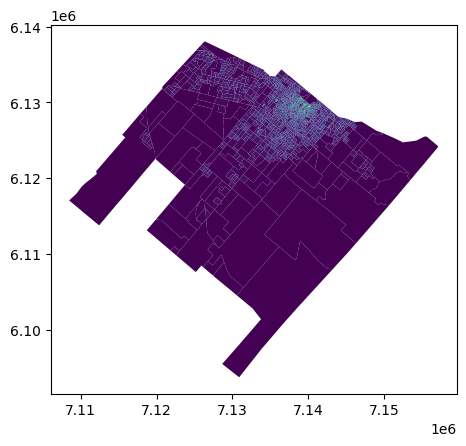

In [12]:
radios.plot("densidad")

In [14]:
from rasterio.features import rasterize
from rasterio.transform import from_bounds

# Get the bounds of your geometries
bounds = radios.total_bounds  # assuming GeoPandas GeoDataFrame
minx, miny, maxx, maxy = bounds

# Define resolution (adjust as needed)
resolution = 10  # meters per pixel, for example

# Calculate output shape
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)
out_shape = (height, width)

# Create transform
transform = from_bounds(minx, miny, maxx, maxy, width, height)

# Create shapes with densidad values
shapes = ((geom, value) for geom, value in zip(radios.geometry, radios['densidad']))

densidad = rasterize(
    shapes,
    out_shape=out_shape,
    transform=transform,
    fill=NODATA,
    dtype=DTYPE,
    all_touched=ALL_TOUCHED
)

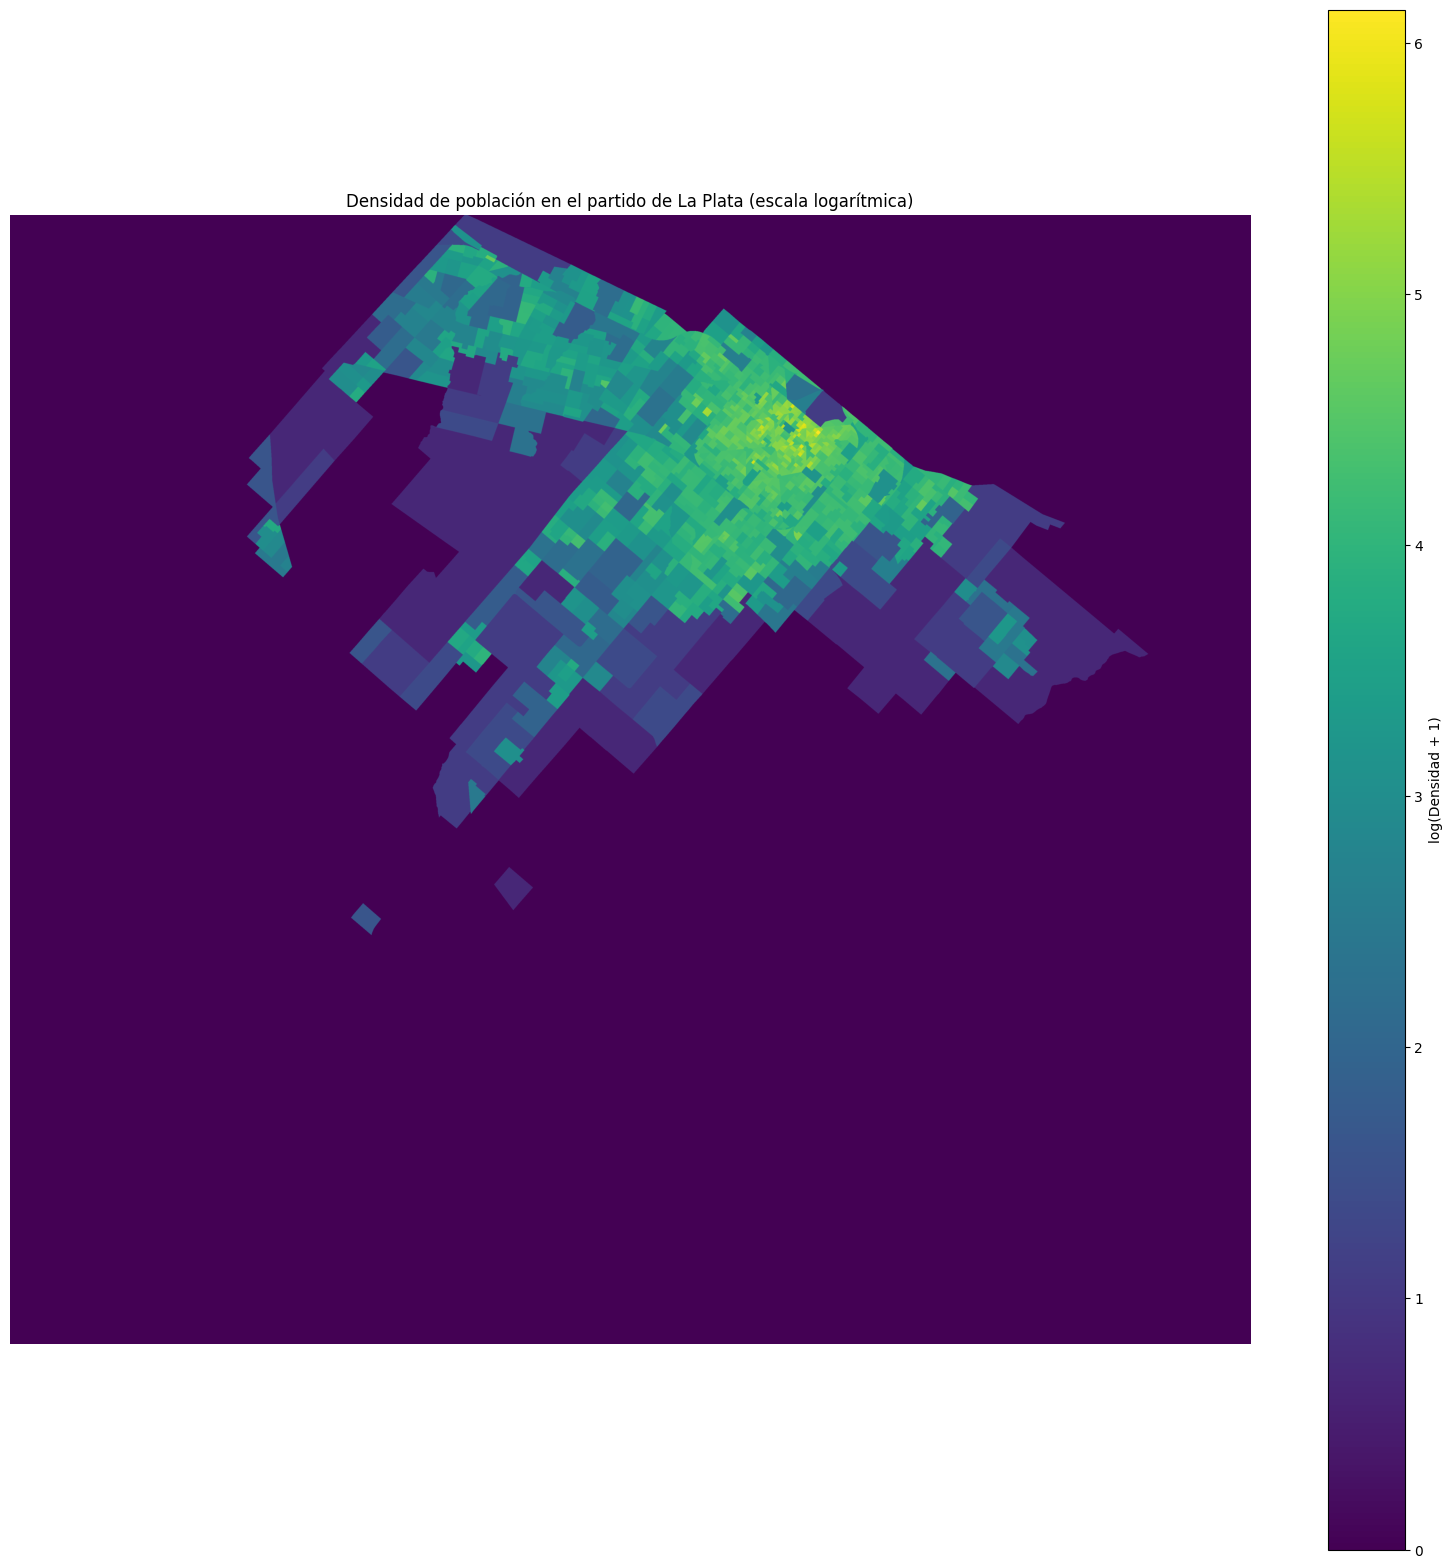

In [17]:
densidad_log = np.log1p(densidad)  # log(densidad + 1)

plt.figure(figsize=(20, 20))
plt.imshow(densidad_log, cmap="viridis")
plt.title("Densidad de población en el partido de La Plata (escala logarítmica)")
plt.colorbar(label="log(Densidad + 1)")
plt.axis("off")
plt.show()